# Homework 08


### ⚠️ Before you start ⚠️

_Duplicate this Jupyter Notebook in your `week-10` folder (right-click -> Duplicate) and then add your last name to the beginning of it (ie. `blevins-hw-08.ipynb` - otherwise you risk having all your work overwritten when you try to sync your GitHub repository with your instructor's repository._


---


## Overview

In this assignment, you'll synthesize some of the Python skills you've learned over the past month or so, including Pandas and Plotly. You'll be analyzing the opening of new businesses in Colorado during the 1940s.

Draw on the following tutorials:

- 💻 Walsh, [Pandas Basics Part 1](https://melaniewalsh.github.io/Intro-Cultural-Analytics/03-Data-Analysis/01-Pandas-Basics-Part1.html)
- 💻 Walsh, [Pandas Basics Part 2](https://melaniewalsh.github.io/Intro-Cultural-Analytics/03-Data-Analysis/02-Pandas-Basics-Part2.html)
- 💻 Walsh, [Pandas Basics Part 3](https://melaniewalsh.github.io/Intro-Cultural-Analytics/03-Data-Analysis/03-Pandas-Basics-Part3.html)
- 🐼 [Pandas Concepts](https://cblevins.github.io/sp25-data/modules/pandas-concepts/)
- 💻 [Introduction to Plotly](https://cblevins.github.io/sp25-data/modules/plotly-intro/)
- 💻 [Cleaning Excel Files](https://cblevins.github.io/sp25-data/modules/excel-cleaning/)


## The Data

First, get the necessary data files from our shared course repository:

- Open GitHub Desktop and select your course repository (`lastname-sp25-data-materials`)
- Click `Fetch origin` to check for updates
- Go to `Branch` → `Merge into current branch` → select `upstream/main` -> `Merge`
- Click `Push origin` to sync everything up
- Launch Jupyter Lab and navigate to the `week-10` folder

You should see a single Excel file that you will be working with: `co-new-businesses-1940s.xlsx`. Inside that Excel file, there are two separate sheets: `New CO Businesses` and `Cities 1940`.

- `New CO Businesses`: This is a subset of new businesses that were established in Colorado during the 1940s - a subset of data drawn from [this database](https://data.colorado.gov/Business/Business-Entities-in-Colorado/4ykn-tg5h/about_data).
- `Cities 1940`: this contains population statistics for Colorado cities in the 1940 Census.


### Import Libraries and Load Data

- Import the necessary libraries:

  - pandas (using the alias `pd`)
  - plotly.express (using the alias `px`)


In [164]:
import pandas as pd
import plotly.express as px

- Load both sheets from the Excel file:
  - Create a variable called `businesses_df` to store the "New CO Businesses" sheet in the Excel file
  - Create a variable called `cities_df` to store the "Cities 1940" sheet in the Excel file
  - Use `pd.read_excel()` with the appropriate parameters


In [167]:
businesses_df = pd.read_excel('co-new-businesses-1940s.xlsx', sheet_name='New CO Businesses')
cities_df = pd.read_excel('co-new-businesses-1940s.xlsx', sheet_name='Cities 1940')
print(businesses_df.shape)  
print(cities_df.shape)

(956, 9)
(221, 3)


### Familiarize Yourself with the Data

Familiarize yourself with the data:

- Display a sample of 10 rows from each dataframe.
- Check the data types for the columns in each dataframe


In [170]:
print(businesses_df.sample(10))  
print(cities_df.sample(10))

        entityid                               Business entity name  \
379  19871105273                                 LAKE DITCH COMPANY   
412  19871106709  BETA TAU SIGMA CHI HOUSE CORPORATION, Dissolve...   
452  19871108852                HODGSON DITCH OPERATING ASSOCIATION   
142  19871010345                  FEDERAL LIFE AND CASUALTY COMPANY   
702  19871116002  THE ROCKY MOUNTAIN ACCORDION SOCIETY, Dissolve...   
166  19871031244                      INTER-STATE ASSURANCE COMPANY   
146  19871010725     PIONEER EQUITABLE INSURANCE COMPANY OF INDIANA   
909  19871113752        CURTIS BROS., INC., Delinquent June 1, 2007   
868  19871143799       THE ROCKY MOUNTAIN QUARTER HORSE ASSOCIATION   
341  19691214256  AMBROSE DEVELOPMENT COMPANY, Dissolved Novembe...   

                               Address      city state  zip_code Country  \
379                                NaN       NaN   NaN       NaN     NaN   
412                                NaN       NaN   NaN       NaN  

In [172]:
print(businesses_df.dtypes)
print(cities_df.dtypes)

entityid                  int64
Business entity name     object
Address                  object
city                     object
state                    object
zip_code                float64
Country                  object
date_entity_formed       object
year_entity_formed        int64
dtype: object
city                object
year                 int64
total population     int64
dtype: object


## Data Cleaning and Preparation

### Cleaning column names

For both datasets, you want to clean and standardize the column names (headers):

- Change column names to all lowercase
- Replace any whitespace with an underscore (`_`) - ex. `some column` becomes `some_column`
- _Hint: Use `str.lower()` and `str.replace()`_
- Show the first 10 rows of your dataframe to make sure it worked


In [175]:
businesses_df.columns = businesses_df.columns.str.lower().str.replace(" ", "_")
cities_df.columns = cities_df.columns.str.lower().str.replace(" ", "_")
print(businesses_df.head(10))
print(cities_df.head(10))

      entityid                               business_entity_name  \
0  19871004753                               ALAMOSA CREDIT UNION   
1  19871241137   THE UNITED METHODIST CHURCH OF STEAMBOAT SPRINGS   
2  19871275274               ALLIED JEWISH FEDERATION OF COLORADO   
3  19871127721         Iglesia CRISTO REY + Christ the King, ELCA   
4  19871117433     LYNCH-COTTEN POST NO. 190, THE AMERICAN LEGION   
5  19871105155          THE BEAR RIVER VALLEY FARMERS COOPERATIVE   
6  19871162072                              Belmar Baptist Church   
7  19871110810        Bethel Lutheran Church of Windsor, Colorado   
8  19871116977  BLACKINTON AND DECKER, INC., Delinquent Novemb...   
9  19871113871                               BOW-MAR OWNERS, INC.   

               address               city state  zip_code country  \
0         2437 MAIN ST            ALAMOSA    CO   81101.0      US   
1           736 OAK ST  STEAMBOAT SPRINGS    CO   80487.0      US   
2    300 S. Dahlia St.           

### Standardize and clean data for cities

- Standardize city names in the business data so that it **removes any trailing or leading whitespace** and **changes the values to all lowercase** (hint: use `.str.strip()` and `.str.lower()`)
- Show the first 10 rows of your dataframe to make sure it worked


In [178]:
businesses_df["city"] = businesses_df["city"].str.strip().str.lower()
print(businesses_df.head(10))

      entityid                               business_entity_name  \
0  19871004753                               ALAMOSA CREDIT UNION   
1  19871241137   THE UNITED METHODIST CHURCH OF STEAMBOAT SPRINGS   
2  19871275274               ALLIED JEWISH FEDERATION OF COLORADO   
3  19871127721         Iglesia CRISTO REY + Christ the King, ELCA   
4  19871117433     LYNCH-COTTEN POST NO. 190, THE AMERICAN LEGION   
5  19871105155          THE BEAR RIVER VALLEY FARMERS COOPERATIVE   
6  19871162072                              Belmar Baptist Church   
7  19871110810        Bethel Lutheran Church of Windsor, Colorado   
8  19871116977  BLACKINTON AND DECKER, INC., Delinquent Novemb...   
9  19871113871                               BOW-MAR OWNERS, INC.   

               address               city state  zip_code country  \
0         2437 MAIN ST            alamosa    CO   81101.0      US   
1           736 OAK ST  steamboat springs    CO   80487.0      US   
2    300 S. Dahlia St.           

## Categorize Cities

### Define your function

Create a function called `categorize_city_size` that does the following:

- Takes in a number that corresponds to the population for a city and returns the following based on the size of the city:
  - `Small Town` if population is less than 1,000
  - `Medium Town` if population is between 1,000 to 5,000
  - `Large Town` if population is between 5,000 to 20,000
  - `City` if population greater than or equal to 20,000


In [181]:
def categorize_city_size(pop):
 if pop < 1000:
  return "Small Town"
 elif 1000 <= pop <= 5000:
  return "Medium Town"
 elif 5000 < pop < 20000:
  return "Large Town"
 else:
  return "City"

### Test Your Function

Test out the function on a single number (`2,000`) to make sure it returns `Medium Town`


In [184]:
categorize_city_size(2000)

'Medium Town'

### Apply the function

- Take your `cities_df` dataframe and add a new column called `city_category` that applies your function to the `total_population` column of the dataframe.
- _Hint: use `apply()`_
- Show the first 10 rows of your dataframe to make sure it worked


In [187]:
cities_df["city_category"] = cities_df["total_population"].apply(categorize_city_size)
print(cities_df.head(10))

       city  year  total_population city_category
0     akron  1940              1417   Medium Town
1   alamosa  1940              5613    Large Town
2      alma  1940               469    Small Town
3  antonito  1940              1220   Medium Town
4    arriba  1940               286    Small Town
5    arvada  1940              1482   Medium Town
6     aspen  1940               777    Small Town
7    aurora  1940              3437   Medium Town
8    basalt  1940               212    Small Town
9  bayfield  1940               372    Small Town


## Analyze Businesses by Year

Let's take a look at how many new businesses were formed in Colorado in each year during the 1940s:

### Calculate new businesses by year

Create a variable called `businesses_per_year` by:

- Counting the number of new businesses based on `year_entity_formed`
- _Hint: use `value_counts()` and `reset_index()`_
- Show the first 10 rows of your dataframe


In [190]:
businesses_per_year = businesses_df["year_entity_formed"].value_counts().reset_index()
print(businesses_per_year.head(10))

   year_entity_formed  count
0                1947    161
1                1948    156
2                1946    153
3                1949    133
4                1945     87
5                1940     72
6                1941     69
7                1943     47
8                1944     43
9                1942     35


### Visualize new businesses by year

Create a bar chart using Plotly Express showing new businesses per year:

- Set x-axis to the year
- Set y-axis to the number of new businesses
- Add an appropriate title and labels
- Display text on each bar
- Hint: Use `px.bar()`


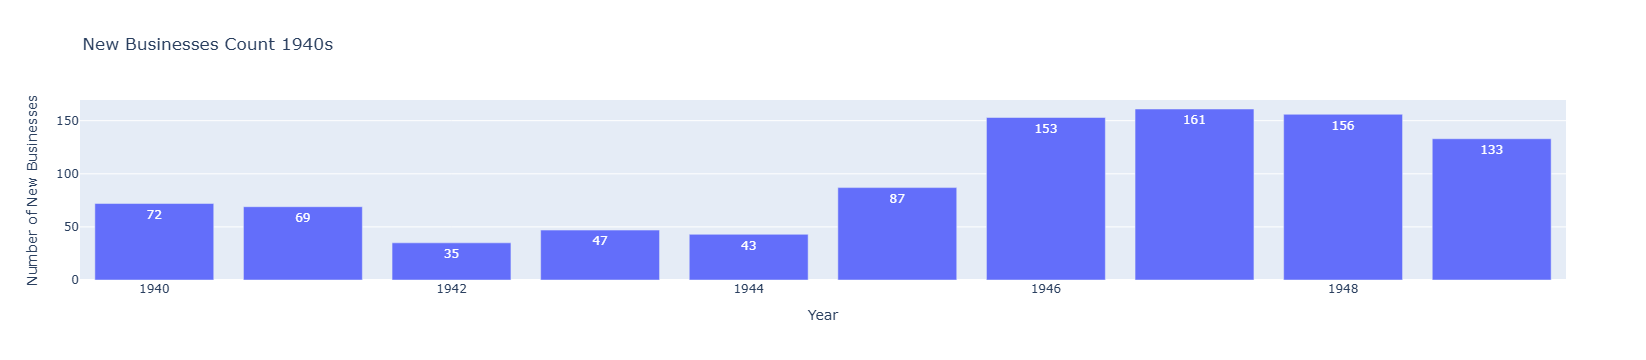

In [193]:
fig = px.bar(
    businesses_per_year,
    x="year_entity_formed",
    y="count",
    text="count",  
    title="New Businesses Count 1940s",
    labels={"year_entity_formed": "Year", "count": "Number of New Businesses"}
)
fig.show()

## Analyze Businesses by City

Let's take a look at how many new businesses were formed in each Colorado city during the 1940s:

## Calculate number of new businesses by city

Create a new variable called `city_businesses` that contains:

- A dataframe with counts of the number of new businesses in each city
- _Hint: Use `value_counts()` and `reset_index()`_
- Show the first 10 rows of your dataframe


In [196]:
city_businesses = businesses_df["city"].value_counts().reset_index()
print(city_businesses.head(10))

               city  count
0            denver    152
1  colorado springs     34
2          lakewood     22
3            pueblo     20
4            arvada     14
5    grand junction     14
6      fort collins     13
7           greeley     13
8        centennial     12
9         englewood     12


## Visualize new businesses by city

Create a bar chart with Plotly Express showing the top 10 cities with the most new businesses created during the 1940s:

- Filter to only show the top 10 cities (hint: use `.head()`)
- Set x-axis to `city`
- Set y-axis to `count`
- Add an appropriate title and labels


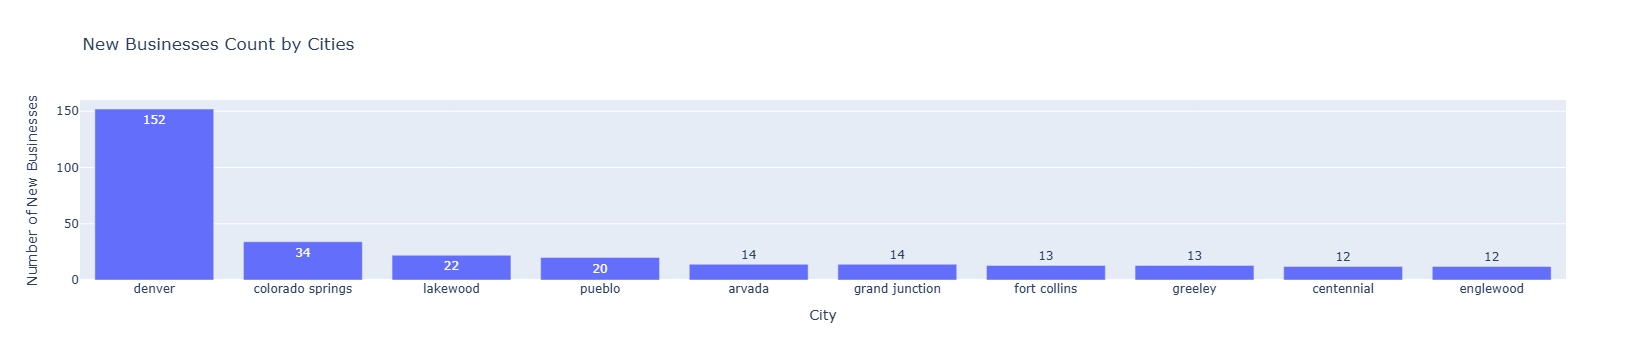

In [199]:
fig = px.bar(
    city_businesses.head(10),
    x="city",
    y="count",
    text="count",  
    title="New Businesses Count by Cities",
    labels={"city": "City", "count": "Number of New Businesses"}
)
fig.show()

## Combine Business and City Data

We have two datasets, both of which contain information about Colorado cities. Let's combine the two into a single dataframe that contains both information about new businesses and their population in the 1940 census.

### Merge dataframes

Merge the two dataframes together:

- Create a new variable called `merged_df`
- Use `pd.merge()` on the `city_businesses` and `cities_df` dataframes
- Figure out which column is shared between the two to use as your "key" to merge them
- ⚠️ **Note: use the `how='inner'` parameter for your merge**
- Show the first 10 rows of your new dataframe


In [202]:
merged_df = pd.merge(
    city_businesses, 
    cities_df, 
    on='city', 
    how='inner'
)
print(merged_df.head(10))

               city  count  year  total_population city_category
0            denver    152  1940            322412          City
1  colorado springs     34  1940             36789          City
2            pueblo     20  1940             52162          City
3            arvada     14  1940              1482   Medium Town
4    grand junction     14  1940             12479    Large Town
5      fort collins     13  1940             12251    Large Town
6           greeley     13  1940             15995    Large Town
7         englewood     12  1940              9680    Large Town
8         littleton     11  1940              2244   Medium Town
9            aurora     10  1940              3437   Medium Town


### Filter out missing values

You'll note that several rows of data contain `NaN` or missing values - this means that there was a city listed in the businesses dataframe but it didn't have a corresponding match in the population dataframe. For now, remove these from the `merged_df` dataframe:

- Filter out rows where `total_population` is NaN
- _Hint: use a filter + `.notna()`_


In [205]:
merged_df = merged_df[merged_df['total_population'].notna()]
print(merged_df)

                 city  count  year  total_population city_category
0              denver    152  1940            322412          City
1    colorado springs     34  1940             36789          City
2              pueblo     20  1940             52162          City
3              arvada     14  1940              1482   Medium Town
4      grand junction     14  1940             12479    Large Town
..                ...    ...   ...               ...           ...
108            meeker      1  1940              1399   Medium Town
109             evans      1  1940               792    Small Town
110        walsenburg      1  1940              5855    Large Town
111        sugar city      1  1940               565    Small Town
112         manzanola      1  1940               531    Small Town

[113 rows x 5 columns]


### Calculate new businesses on a per capita rate

To make it easier to compare larger cities with smaller cities, you're going to calculate a new column for each city: the number of new businesses per 1,000 residents.

- Add a new column to `merged_df` called `biz_per_thousand` that is filled with:
  - A calculation dividing the `count` column by the `total_population` column and multiplying by 1,000
- Sort the merged dataframe by `biz_per_thousand` in descending order
- Show the first 10 rows of the dataframe to check if it worked


In [208]:
merged_df['biz_per_thousand'] = (merged_df['count'] / merged_df['total_population']) * 1000
merged_df = merged_df.sort_values(by="biz_per_thousand", ascending=False).reset_index()
print(merged_df.head(10))

   index                  city  count  year  total_population city_category  \
0     92  green mountain falls      1  1940                87    Small Town   
1     36            keenesburg      3  1940               284    Small Town   
2     59               bennett      2  1940               199    Small Town   
3      3                arvada     14  1940              1482   Medium Town   
4     52              morrison      2  1940               216    Small Town   
5     20           castle rock      5  1940               580    Small Town   
6     33         woodland park      3  1940               372    Small Town   
7     54                granby      2  1940               251    Small Town   
8     79                grover      1  1940               137    Small Town   
9     96               timnath      1  1940               147    Small Town   

   biz_per_thousand  
0         11.494253  
1         10.563380  
2         10.050251  
3          9.446694  
4          9.259259 

## Visualize new business creation by city

Let's say we want to see the cities with the highest _rate_ of business creation (ie. new businesses per thousand residents)

- Create a bar chart in Plotly of `merged_df`:
  - Filter to only show the top 10 cities (use `.head(10)`)
  - Set x-axis to `city`
  - Set y-axis to `biz_per_thousand`
  - Use `city_category` for color
  - Add an appropriate title and labels


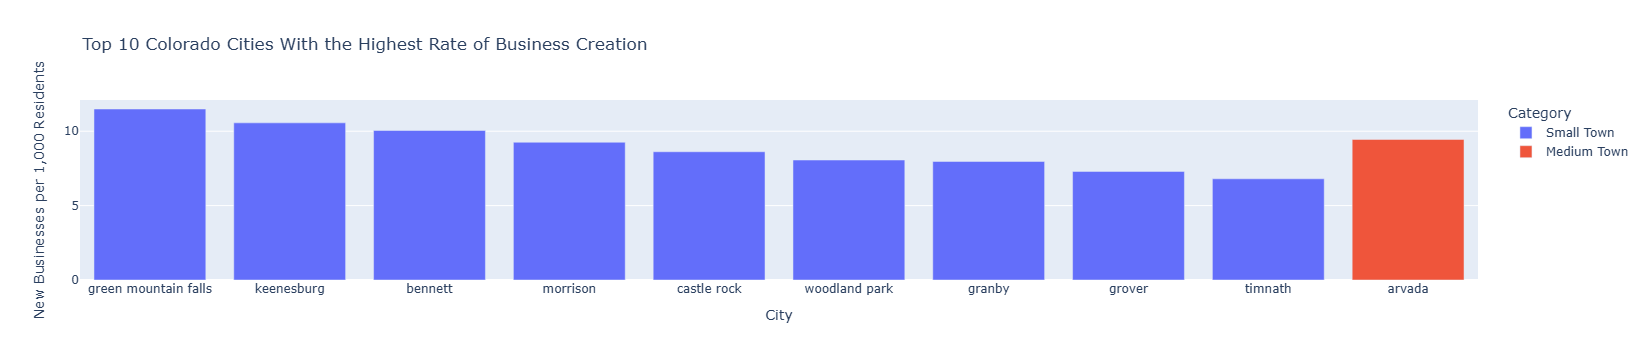

In [211]:
fig = px.bar(
    merged_df.head(10),
    x="city",
    y="biz_per_thousand",
    color="city_category",
    title="Top 10 Colorado Cities With the Highest Rate of Business Creation",
    labels={"city": "City", "biz_per_thousand": "New Businesses per 1,000 Residents", "city_category": "Category"},
)
fig.show()

## Bonus: New businesses by city category

Let's say we want to compare different size categories to see whether new businesses were cropping up in smaller places or bigger cities.

### Create a new dataframe

First, you'll need to create a new dataframe that consists of four rows, with each row a different category of city containing the total number of businesses created within that category of city.

- Create a new dataframe called `city_category_totals`
- Start with `merged_df`
- Group by `city_category`
- Add up (`sum()`) the `count` column
- Use `.reset_index()`


In [214]:
city_category_totals = merged_df.groupby("city_category")["count"].sum().reset_index()
print(city_category_totals)

  city_category  count
0          City    206
1    Large Town     97
2   Medium Town    156
3    Small Town     82


### Visualize businesses by city category

- Create a [pie chart](https://plotly.com/python/pie-charts/) in Plotly:

  - Use `px.pie()` with appropriate parameters
  - Use `city_category_totals` as your dataframe
  - Use `count` for your values
  - Use `city_category` for your names
  - Add an appropriate title and labels


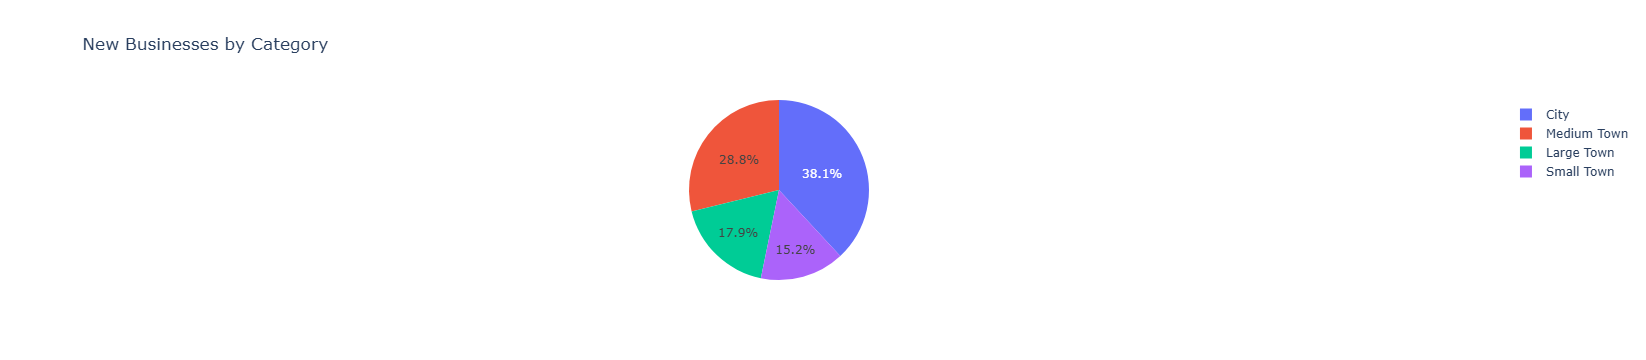

In [217]:
fig = px.pie(
    city_category_totals,
    values="count",
    names="city_category",
    title="New Businesses by Category",
    labels={"count": "Count", "city_category":"City Type"},
)
fig.show()

## Bonus Challenge: Create a Scatterplot

Create a scatter plot in Plotly showing:

- The relationship between city population (x-axis) and new businesses (y-axis)
- Only data for towns with a population of 2,000 or more people.
- Dots sized according to the number of new businesses in that city
- Dots colored according to their size category


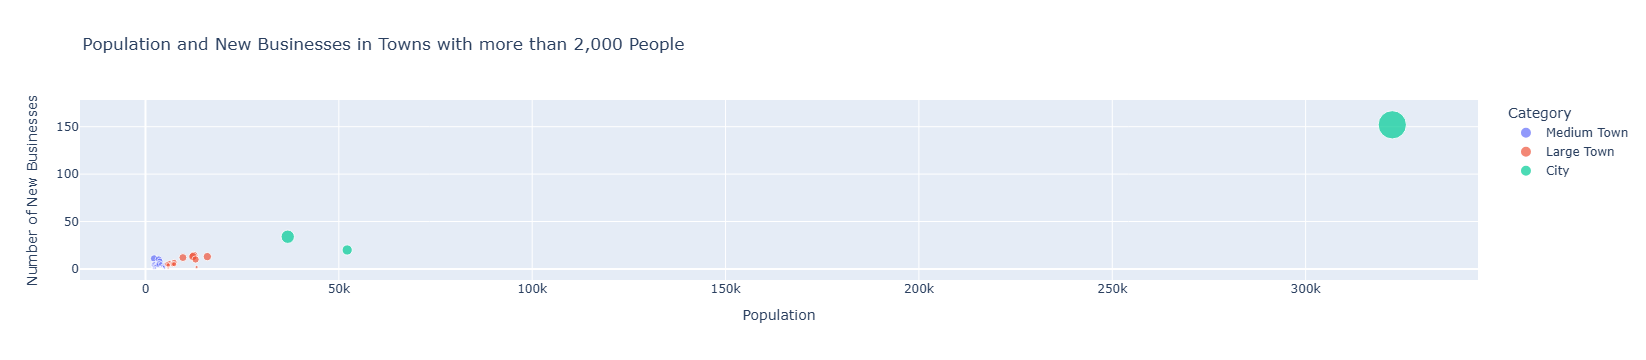

In [220]:
fig = px.scatter(
    merged_df[merged_df["total_population"] >= 2000],
    x="total_population",
    y="count",
    size="count",           
    color="city_category",         
    title="Population and New Businesses in Towns with more than 2,000 People",
    labels={"total_population": "Population","count": "Number of New Businesses","city_category": "Category"}
)
fig.show()

## Submission Guidelines

- Run all code cells and make sure it is outputting without errors
- Submit both the notebook file (.ipynb) and a PDF export of your notebook [on Canvas](https://ucdenver.instructure.com/courses/552717/assignments/1932039)
- Note: the PDF probably won't display the Plotly figures - that's okay
